## Accessing SDSS Images Using Python ##

This notebook describes how to access SDSS images and view them.

You need to have astroquery installed.

http://www.astropy.org/astroquery/



In [56]:
from astroquery.sdss import SDSS
from astroquery.ned import Ned
from astropy import coordinates as coords
import astropy.units as u
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### NED Query ###
Using NED to find the coordinates of an object that we know the name of.

In [4]:
result_table = Ned.query_object('NGC 5353')

In [21]:
print result_table.columns

<TableColumns names=('No.','Object Name','RA(deg)','DEC(deg)','Type','Velocity','Redshift','Redshift Flag','Magnitude and Filter','Distance (arcmin)','References','Notes','Photometry Points','Positions','Redshift Points','Diameter Points','Associations')>


In [22]:
print result_table['RA(deg)'][0]

208.36122


define the position of the galaxy as a SkyCoord.  We use frame='icrs', the International Celestial Reference System.

In [39]:
pos = coords.SkyCoord(ra=result_table['RA(deg)'][0]*u.deg,dec=result_table['DEC(deg)'][0]*u.deg, frame='icrs')

Now we can query SDSS for the image

In [40]:
xid = SDSS.query_region(pos)

In [41]:
print xid

      ra           dec             objid        run  rerun camcol field
------------- ------------- ------------------- ---- ----- ------ -----
208.361358691 40.2830993257 1237662306724020228 3919   301      4    45
 208.36136149 40.2830952107 1237662306724020230 3919   301      4    45
208.361385485 40.2831187131 1237662195071123458 3893   301      4   293
 208.36148706 40.2832024494 1237662195071123468 3893   301      4   293
208.361371207 40.2831026137 1237662306724020232 3919   301      4    45


In [42]:
print xid['ra'][0:-1]

      ra     
-------------
208.361358691
 208.36136149
208.361385485
 208.36148706


In [43]:
sdsscoords = coords.SkyCoord(ra = xid['ra']*u.deg, dec=xid['dec']*u.deg,frame='icrs')

In [52]:
distance = pos.separation(sdsscoords)
match = (distance == min(distance))
print match
print sdsscoords[match]

[False  True False False False]
<SkyCoord (ICRS): (ra, dec) in deg
    ( 208.36136149,  40.28309521)>


In [66]:
im = SDSS.get_images(matches = xid[match], band='g')

In [61]:
print im

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x118c2f8d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x118d9e050>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118d9ed90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118bad310>]]


TypeError: Image data can not convert to float

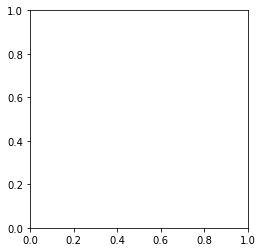

In [64]:
plt.imshow(im[0][1])